In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from gensim.models import Word2Vec
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


In [38]:
#  Load the data
domain1_train_data = pd.read_json('domain1_train_data.json', lines=True)
domain2_train_data = pd.read_json('domain2_train_data.json', lines=True)


print(domain1_train_data.head())
print(domain2_train_data.head())


                                                text  label  id
0  [16, 231, 543, 5, 15, 43, 8282, 94, 231, 1129,...      1   0
1  [16, 4046, 138, 10, 2, 1809, 2007, 3763, 14, 4...      1   1
2  [1108, 16550, 3, 6168, 3, 160, 284, 19, 49, 46...      1   2
3  [1802, 27, 16, 25, 48, 451, 632, 3, 2, 2164, 2...      1   3
4  [16, 19, 302, 93, 97, 43, 952, 118, 1, 16, 528...      1   4
                                                text  label    id
0  [12, 920, 7, 1266, 28, 9884, 1640, 116, 11, 13...      1  5000
1  [783, 397, 253, 5797, 9379, 22, 793, 11838, 10...      1  5001
2  [888, 14851, 323, 9, 27, 1377, 584, 195, 3, 13...      1  5002
3  [228, 1161, 5815, 379, 9, 941, 10, 2, 316, 4, ...      1  5003
4  [736, 19, 37, 813, 45, 6723, 27, 626, 8, 2, 34...      1  5004


In [39]:
domain1_train_data

,text,label,id
0,"[16, 231, 543, 5, 15, 43, 8282, 94, 231, 1129,...",1,0
1,"[16, 4046, 138, 10, 2, 1809, 2007, 3763, 14, 4...",1,1
2,"[1108, 16550, 3, 6168, 3, 160, 284, 19, 49, 46...",1,2
3,"[1802, 27, 16, 25, 48, 451, 632, 3, 2, 2164, 2...",1,3
4,"[16, 19, 302, 93, 97, 43, 952, 118, 1, 16, 528...",1,4
...,...,...,...
4995,"[43, 529, 16, 19, 775, 201, 20, 48, 10, 550, 2...",0,4995
4996,"[12, 158, 97, 5, 543, 174, 1396, 2, 506, 287, ...",0,4996
4997,"[15319, 27775, 9, 27, 2847, 7207, 8, 3234, 1, ...",0,4997
4998,"[16, 373, 177, 76, 5, 35, 1342, 1318, 196, 16,...",0,4998


In [40]:
domain2_train_data

,text,label,id
0,"[12, 920, 7, 1266, 28, 9884, 1640, 116, 11, 13...",1,5000
1,"[783, 397, 253, 5797, 9379, 22, 793, 11838, 10...",1,5001
2,"[888, 14851, 323, 9, 27, 1377, 584, 195, 3, 13...",1,5002
3,"[228, 1161, 5815, 379, 9, 941, 10, 2, 316, 4, ...",1,5003
4,"[736, 19, 37, 813, 45, 6723, 27, 626, 8, 2, 34...",1,5004
...,...,...,...
12995,"[8, 15, 71, 12, 155, 6903, 3, 7, 2300, 352, 37...",0,17995
12996,"[12, 155, 7, 420, 4, 228, 89, 206, 5157, 10, 5...",0,17996
12997,"[216, 2, 379, 4, 7, 332, 179, 386, 160, 28, 11...",0,17997
12998,"[7, 2787, 9, 1026, 7, 5376, 620, 1, 4303, 7, 1...",0,17998


In [41]:
print("Missing values in Domain1 Training Data:")
print(domain1_train_data.isna().sum())

print("\nMissing values in Domain2 Training Data:")
print(domain2_train_data.isna().sum())

Missing values in Domain1 Training Data:
text     0
label    0
id       0
dtype: int64

Missing values in Domain2 Training Data:
text     0
label    0
id       0
dtype: int64


c:\Users\wenji\anaconda3\envs\SML_A1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wenji\anaconda3\envs\SML_A1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


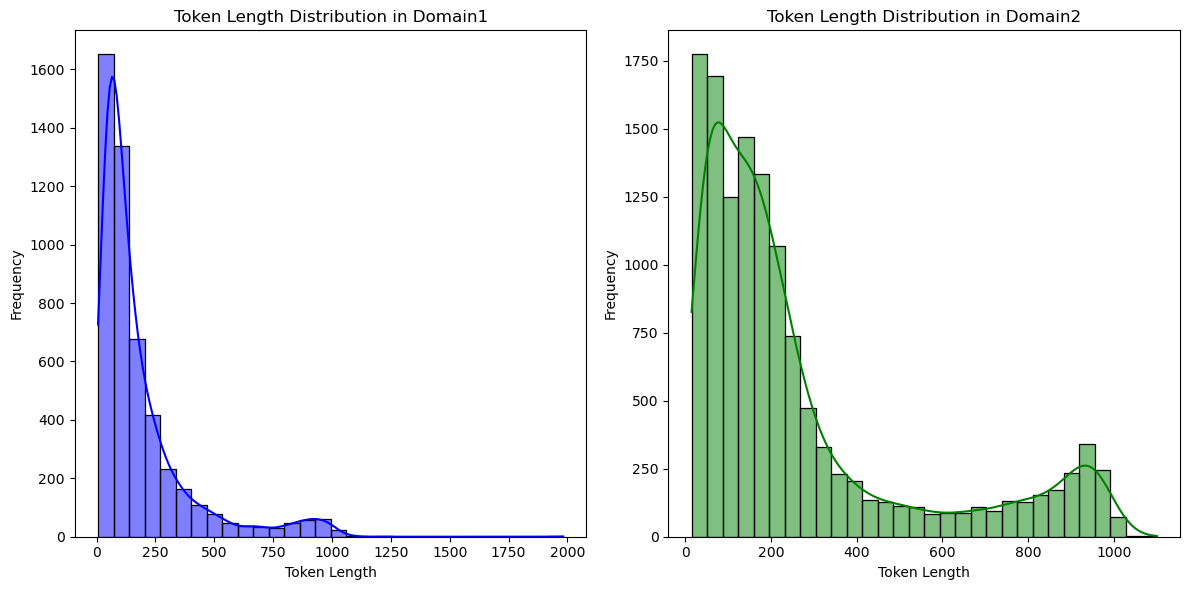

In [42]:
domain1_lengths = domain1_train_data['text'].apply(len)
domain2_lengths = domain2_train_data['text'].apply(len)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(domain1_lengths, bins=30, color='blue', kde=True)
plt.title('Token Length Distribution in Domain1')
plt.xlabel('Token Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(domain2_lengths, bins=30, color='green', kde=True)
plt.title('Token Length Distribution in Domain2')
plt.xlabel('Token Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

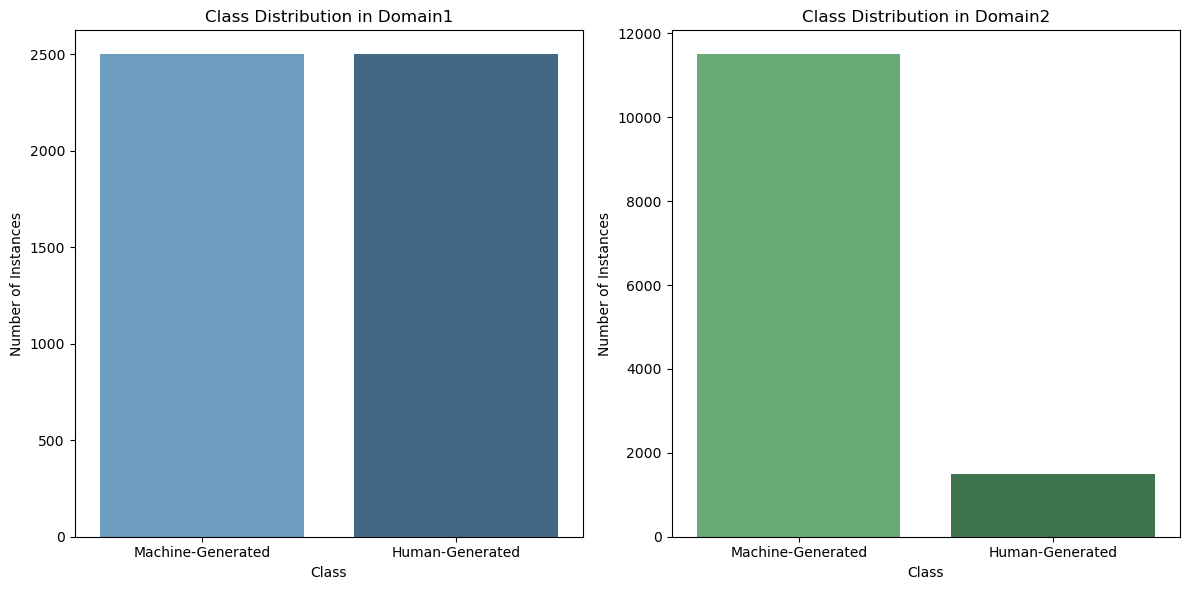

In [43]:
domain1_class_counts = domain1_train_data['label'].value_counts()
domain2_class_counts = domain2_train_data['label'].value_counts()


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=domain1_class_counts.index, y=domain1_class_counts.values, palette='Blues_d')
plt.title('Class Distribution in Domain1')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Machine-Generated', 'Human-Generated'])

plt.subplot(1, 2, 2)
sns.barplot(x=domain2_class_counts.index, y=domain2_class_counts.values, palette='Greens_d')
plt.title('Class Distribution in Domain2')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Machine-Generated', 'Human-Generated'])

plt.tight_layout()
plt.show()

In [44]:
# doain2 label count
domain2_train_data['label'].value_counts()

label
0    11500
1     1500
Name: count, dtype: int64

In [45]:
# get machine and human data
machine = domain2_train_data[domain2_train_data['label'] == 0]
human = domain2_train_data[domain2_train_data['label'] == 1]

# count the number of samples in each class
n_machine = len(machine)
n_human = len(human)

# Filter machine data for samples with token length less than 1000
machine_filtered = machine[machine['text'].apply(len) < 1000]

# Count the number of samples again after filtering
n_machine_filtered = len(machine_filtered)

# Adjust machine_balanced to have exactly 2500 samples if possible
if n_machine_filtered > 2500:
    machine_balanced = machine_filtered.sample(n=2500, random_state=42)
else:
    machine_balanced = machine_filtered
    print("Note: Machine data has less than 2500 samples after filtering for token length.")

# Oversample human data to reach 2500 samples
if n_human < 2500:
    extra_samples_needed = 2500 - n_human
    human_balanced = pd.concat([human, human.sample(n=extra_samples_needed, replace=True, random_state=42)])
else:
    human_balanced = human

# Combine the balanced data
domain2_train_data_balanced = pd.concat([machine_balanced, human_balanced])

# domain2 label count
domain2_train_data_balanced['label'].value_counts()

label
0    2500
1    2500
Name: count, dtype: int64

In [46]:
# combine the two datasets
combined_data = pd.concat([domain1_train_data, domain2_train_data_balanced])


# get the features and labels
X = combined_data['text']
y = combined_data['label']


# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 去除训练集中 id 列
X_train = X_train.drop(columns='id')
X_val = X_val.drop(columns='id')





In [47]:
X_train

2579    [1673, 287, 580, 31, 55, 16, 159, 437, 15, 128...
3278    [2, 8002, 5440, 1832, 4077, 3851, 790, 9, 2748...
4082    [16, 395, 15, 128, 31, 16, 163, 2, 10020, 8670...
2550    [4464, 7349, 9, 258, 2364, 1, 15, 9, 7, 2550, ...
4926    [125, 7, 12705, 31, 7, 122, 79, 128, 8, 2, 412...
                              ...                        
1371    [12, 2387, 5369, 3705, 1955, 4, 84, 255, 4728,...
1230    [2, 102, 4, 507, 1254, 341, 100, 14, 23897, 37...
6330    [4214, 54, 14, 3118, 13, 3, 1727, 21, 7, 193, ...
652     [11455, 39, 21, 3983, 2553, 9, 43, 4, 2, 849, ...
5299    [1391, 3684, 8, 4235, 146, 54, 116, 9, 233, 27...
Name: text, Length: 6400, dtype: object

In [48]:
# 将词语列表转换为字符串
X_train_str = [' '.join(map(str, lst)) for lst in X_train]
X_val_str = [' '.join(map(str, lst)) for lst in X_val]

# tf-idf向量化
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
# vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_str)
X_val_vec = vectorizer.transform(X_val_str)



In [49]:
print("X_train_vec shape:", X_train_vec.shape)
print("X_train_vec type:", type(X_train_vec))
print("y_train shape:", y_train.shape)
print("y_train type:", type(y_train))


X_train_vec shape: (6400, 1201789)
X_train_vec type: <class 'scipy.sparse._csr.csr_matrix'>
y_train shape: (6400,)
y_train type: <class 'pandas.core.series.Series'>


rf Performance:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       788
           1       0.82      0.80      0.81       812

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



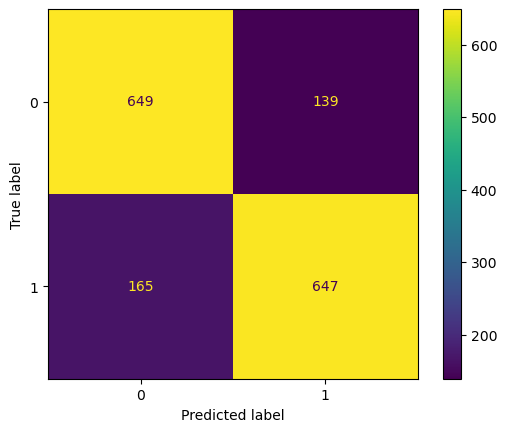

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=350)
rf_model.fit(X_train_vec, y_train)

# evaluate SVM model on validation set
rf_predictions = rf_model.predict(X_val_vec)
print("rf Performance:")
print(classification_report(y_val, rf_predictions))

# confusion matrix
cm = confusion_matrix(y_val, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [300, 400, 500, 600],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                            param_grid=param_grid,
#                            cv=3,  # Number of cross validation folds
#                            verbose=2,  # Controls the verbosity: the higher, the more messages
#                            n_jobs=-1)  # Number of jobs to run in parallel

# # Fit GridSearchCV
# grid_search.fit(X_train_vec, y_train)

# # Best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# # Evaluate on the validation set
# best_model = grid_search.best_estimator_
# rf_predictions = best_model.predict(X_val_vec)
# print("RF Performance on Validation Set:")
# print(classification_report(y_val, rf_predictions))

# # Confusion Matrix
# cm = confusion_matrix(y_val, rf_predictions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()


In [54]:
# # 读取测试数据
# test_data = pd.read_json('test_data.json', lines=True)

# # json文件是一个字典，其中包含一个键为'text'的项，其值是一个包含所有测试样本的列表
# test_texts = [' '.join(map(str, lst)) for lst in test_data['text']]

# # 使用相同的向量化器来转换测试数据
# X_test = vectorizer.transform(test_texts)

# # 使用模型进行预测
# predictions = rf_model.predict(X_test)

# # 创建一个数据框，其中'id'列是样本的ID（通常是一个从0开始的整数序列），'class'列是预测结果
# submission = pd.DataFrame({
#     'id': range(len(predictions)),
#     'class': predictions
# })

# submission.to_csv('results/rf_2.csv', index=False)